In [25]:
import torch
import torchvision
from torchvision import models, transforms
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
print("Torch Version: ", torch.__version__)
print("Torchvision Version: ", torchvision.__version__)

Torch Version:  2.3.1
Torchvision Version:  0.18.1


In [6]:
use_pretrained = True
net = models.vgg16(pretrained=use_pretrained)
net.eval()
print(net)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [8]:
class BaseTransform():
    def __init__(self, resize, mean, std):
        self.base_transform = transforms.Compose([
            transforms.Resize(resize),
            transforms.CenterCrop(resize),
            transforms.ToTensor(),
            transforms.Normalize(mean, std)
        ])
    
    def __call__(self, img):
        return self.base_transform(img)

In [ ]:
# !mkdir -p data

# import urllib.request
# url = "https://cdn.outsideonline.com/wp-content/uploads/2023/03/Funny_Dog_S.jpg"
# save_path = "./data/dog.jpg"
# urllib.request.urlretrieve(url, save_path)

('./data/dog.jpg', <http.client.HTTPMessage at 0x12fac14d0>)

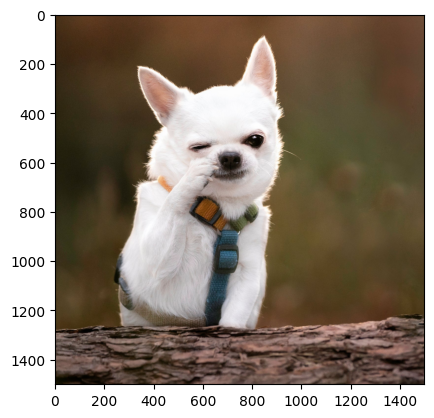

In [14]:
img = Image.open("./data/dog.jpg")

resize = 224
mean = (0.485, 0.456, 0.406)
std = (0.229, 0.224, 0.225)

plt.imshow(img)
plt.show()

torch.Size([3, 224, 224])


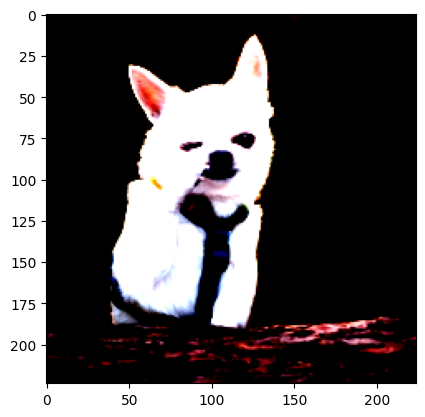

In [33]:
transform = BaseTransform(resize, mean, std)
img_transformed = transform(img)
print(img_transformed.size())

# PIL (H, W, C) -> Pytorch Tensor (C, H, W)
img_transformed = img_transformed.numpy().transpose((1, 2, 0))
img_transformed = np.clip(img_transformed, 0, 1)
plt.imshow(img_transformed)
plt.show()